In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
import datetime

In [3]:
from google.colab import files
#uploaded = files.upload()

data = pd.read_csv("russian_passenger_air_service.csv")
data

,Airport name,Year,January,February,March,April,May,June,July,August,September,October,November,December,Whole year,Airport coordinates
0,Abakan,2020,13495.0,14940.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,"(Decimal('91.399735'), Decimal('53.751351'))"
1,Aikhal,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,"(Decimal('111.543324'), Decimal('65.957161'))"
2,Loss,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,"(Decimal('125.398355'), Decimal('58.602489'))"
3,Amderma,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,"(Decimal('61.577429'), Decimal('69.759076'))"
4,Anadyr (Carbon),2020,4255.0,4565.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,"(Decimal('177.738273'), Decimal('64.713433'))"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3956,Yakutsk,2007,27636.0,25976.0,34291.0,38803.0,38478.0,59142.0,67295.0,75257.0,52681.0,44505.0,40439.0,1916.60,545577.0,"(Decimal('129.750225'), Decimal('62.086594'))"
3957,Yakutsk (Magan),2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,"(Decimal('-6.226888'), Decimal('8.607871'))"
3958,Yamburg,2007,6239.0,3195.0,6648.0,6268.0,6088.0,6028.0,5975.0,6024.0,6262.0,6451.0,6968.0,8.87,72626.0,"(Decimal('75.097783'), Decimal('67.980026'))"
3959,Yaroslavl (Tunoshna),2007,557.0,720.0,650.0,411.0,328.0,864.0,688.0,965.0,883.0,505.0,640.0,2055.60,8277.0,"(Decimal('40.170054'), Decimal('57.56231'))"


In [4]:
#Группируем по городу Уфа

data.groupby('Airport name').groups
Ufa = data.groupby('Airport name').get_group('Ufa')
Ufa = Ufa[Ufa['Year']<2020]
Ufa

,Airport name,Year,January,February,March,April,May,June,July,August,September,October,November,December,Whole year,Airport coordinates
467,Ufa,2019,236704.0,204548.0,245798.0,253361.0,322258.0,339687.0,366716.0,367994.0,339334.0,321862.0,275884.0,423.33,3556533.0,"(Decimal('55.883529'), Decimal('54.566329'))"
715,Ufa,2018,220199.0,197567.0,216207.0,228911.0,289878.0,323439.0,342056.0,344004.0,313823.0,272209.0,234884.0,543.31,3222825.0,"(Decimal('55.883529'), Decimal('54.566329'))"
1005,Ufa,2017,171739.0,155316.0,177796.0,192087.0,238587.0,284752.0,308839.0,307451.0,281008.0,239374.0,213049.0,412.28,2794407.0,"(Decimal('55.883529'), Decimal('54.566329'))"
1297,Ufa,2016,152683.0,150393.0,160835.0,156943.0,182466.0,213608.0,239787.0,257228.0,233816.0,200922.0,171124.0,447.96,2295446.0,"(Decimal('55.883529'), Decimal('54.566329'))"
1589,Ufa,2015,145967.0,125682.0,154403.0,163012.0,205385.0,247188.0,266675.0,265935.0,219733.0,187378.0,149715.0,305.93,2291502.0,"(Decimal('55.883529'), Decimal('54.566329'))"
1881,Ufa,2014,155741.0,141234.0,167796.0,168504.0,209195.0,238456.0,261610.0,267025.0,226477.0,190122.0,165828.0,416.88,2356467.0,"(Decimal('55.883529'), Decimal('54.566329'))"
2173,Ufa,2013,142779.0,130538.0,148848.0,155600.0,186312.0,217729.0,238699.0,240632.0,211886.0,183280.0,163838.0,380.85,2186579.0,"(Decimal('55.883529'), Decimal('54.566329'))"
2465,Ufa,2012,126881.0,116792.0,124468.0,129868.0,155795.0,183053.0,201774.0,208554.0,183072.0,161303.0,146581.0,382.08,1886451.0,"(Decimal('55.883529'), Decimal('54.566329'))"
2757,Ufa,2011,103853.0,92153.0,102914.0,113185.0,137565.0,165061.0,183075.0,188379.0,163235.0,139477.0,128164.0,415.27,1651177.0,"(Decimal('55.883529'), Decimal('54.566329'))"
3049,Ufa,2010,85403.0,80758.0,99621.0,108220.0,126422.0,149950.0,160561.0,155760.0,139895.0,124118.0,114344.0,375.44,1460009.0,"(Decimal('55.883529'), Decimal('54.566329'))"


In [5]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']

#Декабрь в базе приведен неверно - надо из всего года вычесть все остальные месяцы
Ufa['December'] = Ufa['Whole year'] - Ufa[months[:-1]].sum(axis = 1)

#Года переставили в порядке возрастания
K = np.array(Ufa[months])[::-1]

#Эта функция вытягивает двумерный массив в одномерный
K1 = K.flatten()

#Рассмотрим все в тысчах
KInThousand=K1/1000

Data = pd.DataFrame(KInThousand, columns = ['Pas'])
Data

,Pas
0,71.544
1,65.229
2,74.037
3,77.790
4,88.928
...,...
151,367.994
152,339.334
153,321.862
154,275.884


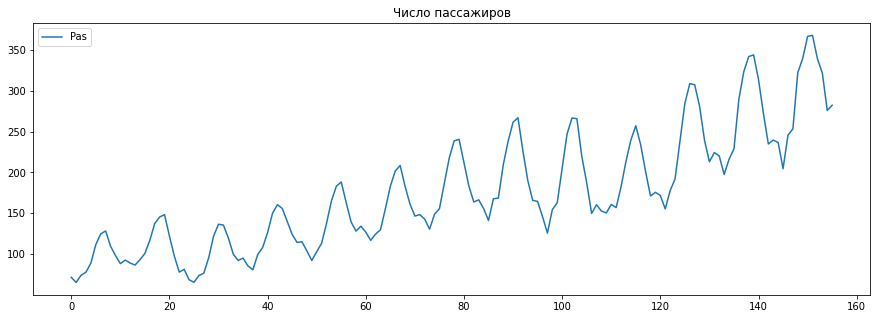

In [6]:
Data.plot(figsize=(15,5), title='Число пассажиров')

Проведем тест Дики-Фулера

Нулевая гипотеза, что единичный корень - есть, то есть, что стационарности - нет!

В ответе - первой строчкой значение статистики, а потом в фигурных скобках перечислены критические точки для трех уровней значимости (критическое множество - влево)

In [7]:
test = sm.tsa.adfuller(Data['Pas'])
test

(1.2462342308624819,
 0.9962902569413553,
 14,
 141,
 {'1%': -3.4776006742422374,
  '10%': -2.5778219289774156,
  '5%': -2.882265832283648},
 999.9346920543853)

Критическое множество - влево и поэтому - если значение статистики было бы меньше, чем -3.47, то нулевую гипотезу отвергли бы на уровне значимости 1 процент и тд

В данном случае Гипотеза ***принимается*** на всех трех уровнях -- Стационарности нет


Переходим к первым разностям - вместо $X_n$  рассматриваем $Y_n = X_n - X_{n-1}$. Смысл - это "дискретное дифференцирование".  - если функция линейна, то ее производная постоянна, если ряд имел линейный тренд, то есть
$X_n = an + \beta_1 X_{n-1}+... +\varepsilon_n$, то у $Y_n$ уже тренда не будет:
 


$X_n = an + \beta_1 X_{n-1}+... +\varepsilon_n$

$X_{n-1} = a(n-1) + \beta_1 X_{n-2}+... +\varepsilon_n$

$Y_n = a + \beta_1 Y_{n-1}+... +\varepsilon_n - \varepsilon_{n-1}$

In [8]:
Datadiff1 = Data.diff(periods=1).dropna()
#Применим тест Дики-Фуллера для нового ряда:
test1 = sm.tsa.adfuller(Datadiff1['Pas'])
test1

(-2.3607522083680434,
 0.15312149791389962,
 14,
 140,
 {'1%': -3.4779446621720114,
  '10%': -2.577901887755102,
  '5%': -2.8824156122448983},
 986.2262092120236)

В данном случае Стационарности опять нет на всех уровнях


---
Рассмотрим 2-ые разности:
$\Delta (\Delta Y_n) = \Delta Y_{n+1} - \Delta Y_n = (X_{k+2}-X_{k+1})-(X_{k+1}-X_k)=(X_{k+2}-X_k)-2(X_{k+1}-X_k)$

In [9]:
Datadiff2 = Data.diff(periods=2).dropna() - 2*Datadiff1
Datadiff2 = Datadiff2.dropna()
test2 = sm.tsa.adfuller(Datadiff2['Pas'])
test2

(-7.307108949367626,
 1.2928658812697196e-10,
 14,
 139,
 {'1%': -3.4782936965183815,
  '10%': -2.5779830117488745,
  '5%': -2.882567574015525},
 983.7401739925855)

Данный ряд стационарен на уровне начимости 1%

Изобразим модель:

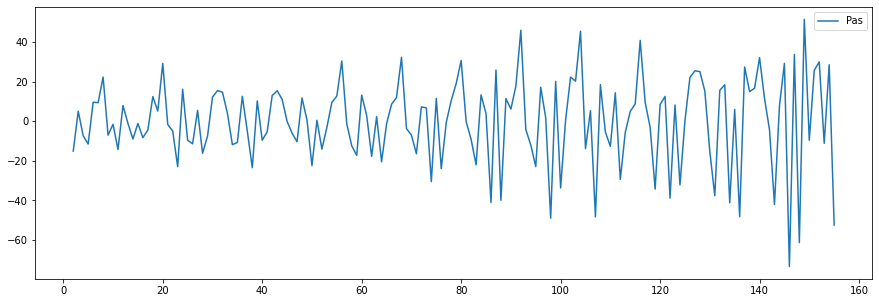

In [10]:
Datadiff2.plot(figsize=(15,5))

Нарисуем ACF и PACF, чтобы было удобнее подбирать модель ARIMA

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


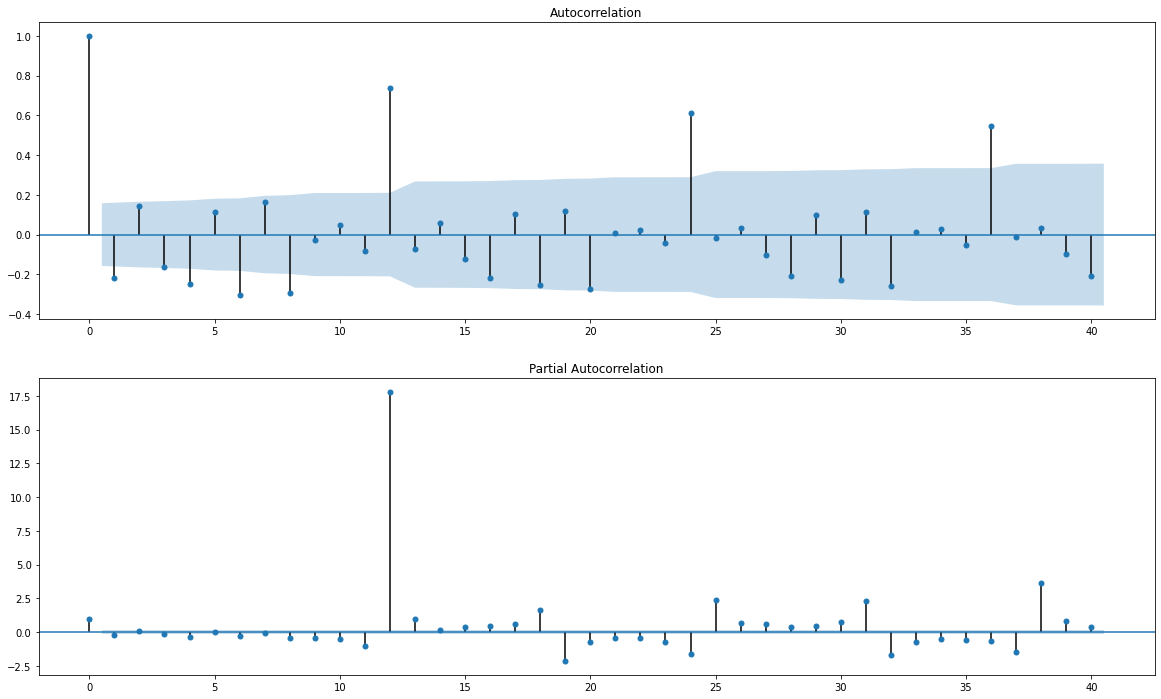

In [11]:
fig = plt.figure(figsize=(20,12))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(Datadiff2.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Datadiff2, lags=40, ax=ax2)

AR - авторегрессия, число p - это ее порядок

I - интегрированность, число d - порядок интегрированности ряда - сколько раз переходили к разностям

MA - moving average - скользящее среднее, число q - его порядок

ИТОГО - считаем что

$Y_n = a + \beta_1 Y_{n-1}+... +\beta_p Y_{n-p} + \alpha_1 \varepsilon_{n-1}+... +\alpha_q \varepsilon_{n-q} +\varepsilon_n$

Главная задача - подобрать числа (p,d,q)

d = 2

In [12]:
M = sm.tsa.statespace.SARIMAX(Data[:144], 
                              order=[1, 2, 1], 
                              seasonal_order=[2, 0, 0, 12],
                              trend=None).fit()
print(M.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


                                 Statespace Model Results                                 
Dep. Variable:                                Pas   No. Observations:                  144
Model:             SARIMAX(1, 2, 1)x(2, 0, 0, 12)   Log Likelihood                -490.648
Date:                            Sat, 23 Jul 2022   AIC                            991.296
Time:                                    01:28:40   BIC                           1006.076
Sample:                                         0   HQIC                           997.302
                                            - 144                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2866      0.075      3.799      0.000       0.139       0.434
ma.L1         -0.9992      0.117   

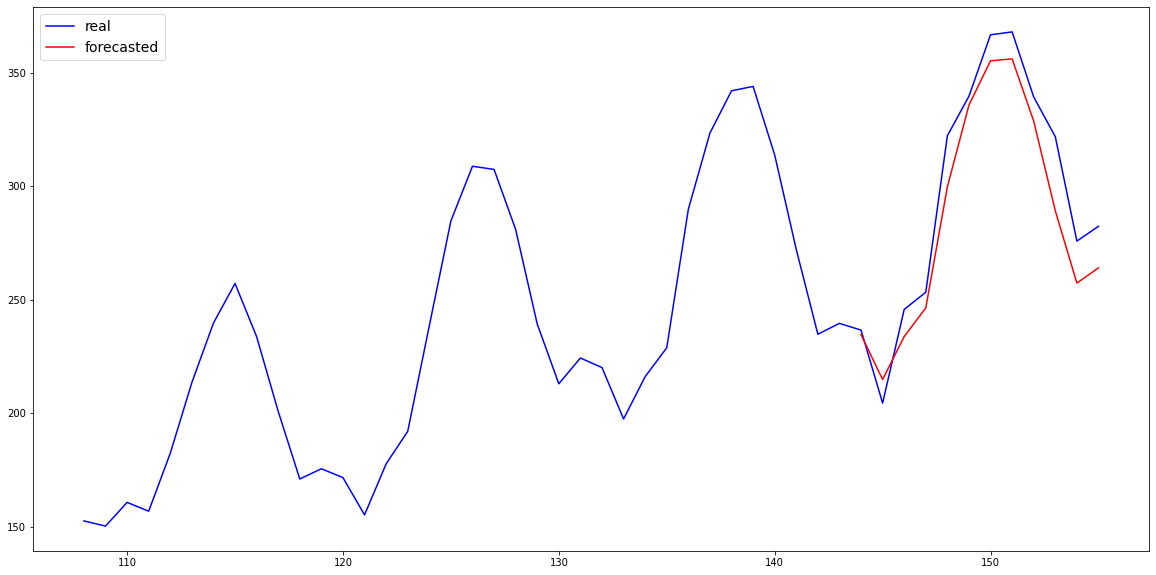

In [13]:
plt.figure(figsize=(20,10))
plt.plot(Data[108:]['Pas'],color='blue',label='real')
plt.plot( M.forecast(12), color='red',label='forecasted' )
plt.legend(loc='best', fontsize = 14)
plt.show()